In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")
#city_data_to_load 


# Read the City and Ride Data
#ride_data_to_load
# Combine the data into a single dataset
combined_data = pd.merge(ride_data_to_load, city_data_to_load, how = 'left', on=['city', 'city'])


In [4]:
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

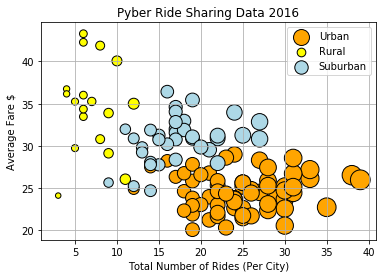

In [94]:
# Obtain the x and y coordinates for each of the three city types


groupedU = combined_data.groupby('type').get_group("Urban")
groupedR = combined_data.groupby('type').get_group("Rural")
groupedSU = combined_data.groupby('type').get_group("Suburban")


combined_data_group_totalU = groupedU.groupby(['city']).count()["ride_id"]
combined_data_group_avgU = groupedU.groupby(['city']).mean()["fare"]
combined_data_group_dcU = groupedU.groupby(['city']).count()["driver_count"]

combined_data_group_totalR = groupedR.groupby(['city']).count()["ride_id"]
combined_data_group_avgR = groupedR.groupby(['city']).mean()["fare"]
combined_data_group_dcR = groupedR.groupby(['city']).count()["driver_count"]

combined_data_group_totalSU = groupedSU.groupby(['city']).count()["ride_id"]
combined_data_group_avgSU = groupedSU.groupby(['city']).mean()["fare"]
combined_data_group_dcSU = groupedSU.groupby(['city']).count()["driver_count"]


#df3.groupby(['X']).get_group('A')


plt.scatter(combined_data_group_totalU, combined_data_group_avgU, s = combined_data_group_dcU*10, color='Orange', label='Urban',edgecolors='black',linewidths=1);
plt.scatter(combined_data_group_totalR, combined_data_group_avgR, s = combined_data_group_dcR*10, color='Yellow', label='Rural',edgecolors='black');
plt.scatter(combined_data_group_totalSU, combined_data_group_avgSU, s = combined_data_group_dcSU*10, color='LightBlue', label='Suburban',edgecolors='black');
plt.grid()

plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare $")
plt.legend()







# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("scatter.png")

In [6]:
# Show plot
plt.show()

## Total Fares by City Type

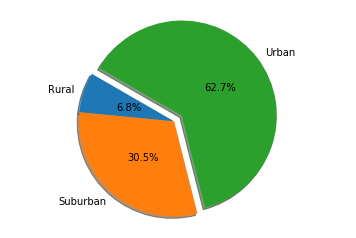

In [82]:
# Calculate Type Percents
combined_data_group_totalF = combined_data.groupby(['type']).sum()["fare"]
combined_data_group_totalFDF = pd.DataFrame(combined_data_group_totalF)
combined_data_group_totalFDF["fare"]["Rural"]
labels = ["Rural", "Suburban", "Urban"]
# Total_1= combined_data_group_totalF["Rural"] + combined_data_group_totalF["Urban"]+ combined_data_group_totalF["Suburban"]
# Total_1
explode = (0, 0, .1)
#combined_data_group_totalF

# Build Pie Chart
plt.pie(combined_data_group_totalFDF["fare"],explode=explode,shadow=True, pctdistance=.5,labels = labels, startangle=150,autopct="%1.1f%%")
# Save Figure
plt.axis("equal")
plt.savefig("TFBCities.png")

In [72]:
# Show Figure
plt.show()

## Total Rides by City Type

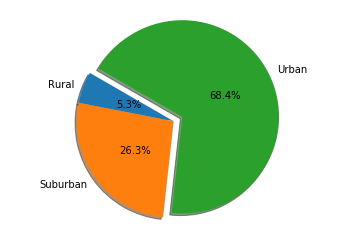

In [86]:
# Calculate Ride Percents
combined_data_group_totalRides = combined_data.groupby(['type']).count()["ride_id"]
combined_data_group_totalRidesDF = pd.DataFrame(combined_data_group_totalRides)
combined_data_group_totalRidesDF["ride_id"]["Rural"]
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, .1)
# Build Pie Chart
plt.pie(combined_data_group_totalRidesDF["ride_id"],explode=explode,shadow=True, pctdistance=.5,labels = labels, startangle=150,autopct="%1.1f%%")
# Save Figure
plt.axis("equal")
plt.savefig("TRBCities.png")
# Save Figure


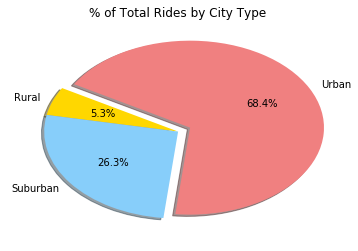

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [93]:
# Calculate Driver Percents
combined_data_group_totalDrivers = combined_data.groupby(['type']).value_counts()["driver_count"]
combined_data_group_totalDriversDF = pd.DataFrame(combined_data_group_totalDrivers)
combined_data_group_totalDriversDF["driver_count"]["Rural"]
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, .1)
# Build Pie Chart
plt.pie(combined_data_group_totalDriversDF["driver_count"],explode=explode,shadow=True, pctdistance=.5,labels = labels, startangle=150,autopct="%1.1f%%")
# Save Figure
plt.axis("equal")
plt.savefig("TDBCities.png")

# Build Pie Charts

# Save Figure


AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

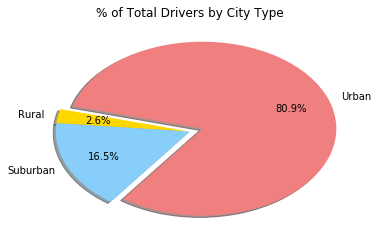

In [6]:
# Show Figure
plt.show()